### TITANIC REGRESSION MODEL

In [73]:
import pandas as pd
import re

In [74]:
train = pd.read_csv("train.csv")

In [75]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [76]:
test = pd.read_csv("test.csv")

In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [77]:
titanic = pd.concat([train,test], sort=False)

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [78]:
import seaborn as sns

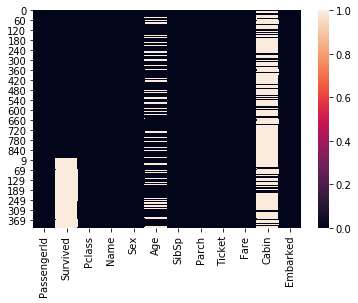

In [10]:
sns.heatmap(titanic.isnull())

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Treat Age & Fare

In [79]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [80]:
# Age
titanic.loc[titanic['Age'] <= 16, 'Age'] = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] =2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
titanic.loc[ titanic['Age'] > 64, 'Age' ] =4;

In [81]:
# Mapping Fare
titanic.loc[titanic['Fare'] <= 7.91, 'Fare'] = 0
titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare'] = 2
titanic.loc[titanic['Fare'] > 31, 'Fare'] = 3

### Treat Cabin

In [16]:
titanic['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [82]:
import numpy as np
np.count_nonzero(titanic['Cabin'].isnull())

1014

In [83]:
titanic['Cabin'] = titanic['Cabin'].fillna('Missing')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


#### Treat Embarked

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [84]:
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [85]:
# Use the idxmax to extra the index of a series who value is maximum
titanic['Embarked'].value_counts().idxmax()

'S'

In [86]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


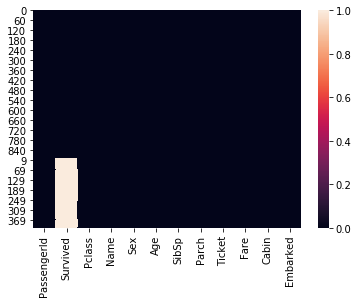

In [87]:
sns.heatmap(titanic.isnull())

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Creating Features

In [88]:
titanic['Pclass'] = titanic['Pclass'].astype(str)

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null object
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


In [89]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ""

In [90]:
titanic['Title'] = titanic['Name'].apply(get_title)

In [91]:
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [92]:
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [93]:
titanic['Cabin'] = titanic['Cabin'].str[0]
titanic['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [94]:
titanic['Cabin'] = titanic['Cabin'].replace(['F', 'G', 'T'], 'O')
titanic['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
O      27
A      22
Name: Cabin, dtype: int64

In [95]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,M,S,Mr,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3.0,C,C,Mrs,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1.0,M,S,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3.0,C,S,Mrs,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1.0,M,S,Mr,1,1


In [96]:
titanic_all = titanic.drop(['PassengerId','Name','SibSp','Parch'],axis=1)

In [97]:
titanic_all.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0.0,3,male,1.0,A/5 21171,0.0,M,S,Mr,2,0
1,1.0,1,female,2.0,PC 17599,3.0,C,C,Mrs,2,0
2,1.0,3,female,1.0,STON/O2. 3101282,1.0,M,S,Miss,1,1
3,1.0,1,female,2.0,113803,3.0,C,S,Mrs,2,0
4,0.0,3,male,2.0,373450,1.0,M,S,Mr,1,1


In [98]:
titanic_dummies=pd.get_dummies(titanic_all, drop_first=True)
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 948 entries, Survived to Title_Rare
dtypes: float64(3), int64(2), uint8(943)
memory usage: 1.2 MB


In [99]:
#Get Train
t_train = titanic_dummies[titanic_dummies['Survived'].notnull()]
t_train.describe()

,Survived,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_110413,Ticket_110465,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.290685,1.505051,1.904602,0.602694,0.206510,0.551066,0.647587,0.003367,0.002245,...,0.037037,0.035915,0.771044,0.020202,0.086420,0.725028,0.207632,0.580247,0.141414,0.025814
std,0.486592,0.812620,1.118148,1.613459,0.489615,0.405028,0.497665,0.477990,0.057961,0.047351,...,0.188959,0.186182,0.420397,0.140770,0.281141,0.446751,0.405840,0.493796,0.348644,0.158668
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,4.000000,3.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
#Get Test
s_test = titanic_dummies[titanic_dummies['Survived'].isnull()]
s_test.describe()

,Survived,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_110413,Ticket_110465,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
count,0.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.0,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,NaN,1.303828,1.492823,1.839713,0.605263,0.222488,0.521531,0.636364,0.0,0.0,...,0.031100,0.021531,0.782297,0.021531,0.110048,0.645933,0.188995,0.574163,0.172249,0.014354
std,NaN,0.762449,1.148953,1.519072,0.489380,0.416416,0.500135,0.481622,0.0,0.0,...,0.173797,0.145320,0.413179,0.145320,0.313324,0.478803,0.391974,0.495062,0.378049,0.119088
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,NaN,4.000000,3.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
X = t_train.iloc[:,1:]
X.head()

,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_110413,Ticket_110465,Ticket_110469,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1.0,0.0,2,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,2.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,2.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2.0,1.0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [102]:
X = t_train.iloc[:,1:]
X.head()

,Age,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Ticket_110413,Ticket_110465,Ticket_110469,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1.0,0.0,2,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,2.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,2.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2.0,1.0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [103]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 200)

In [104]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [105]:
#Build model
logreg = LogisticRegression()
logreg.fit( X_train, y_train)
#Ravel is used to convert to a single 1D array | https://www.geeksforgeeks.org/numpy-rave

D:\Anaconda_Installation\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
logreg.score(X_test,y_test)

0.7932960893854749

In [107]:
t_predictions = logreg.predict(X_test)
t_predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test,t_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       104
         1.0       0.79      0.69      0.74        75

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [110]:
t_predictions = logreg.predict(s_test.iloc[:,1:])
t_predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [111]:
#Get Passender ID from Test
PassengerId = test['PassengerId']
PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [112]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': t_predictions })
NumSubmission.to_csv("NumSubmission_with_all_Logistic.csv", index=False)

### BaggingClassifier

In [113]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [114]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [115]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [116]:
clf.oob_score_

0.8455056179775281

In [117]:
clf.score(X_test,y_test)

0.7821229050279329

In [118]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

D:\Anaconda_Installation\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda_Installation\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.8356741573033708
************************
For n_estimators = 30
OOB score is 0.851123595505618
************************
For n_estimators = 50
OOB score is 0.8497191011235955
************************
For n_estimators = 70
OOB score is 0.851123595505618
************************
For n_estimators = 90
OOB score is 0.8497191011235955
************************
For n_estimators = 110
OOB score is 0.848314606741573
************************
For n_estimators = 130
OOB score is 0.8469101123595506
************************
For n_estimators = 150
OOB score is 0.8441011235955056
************************
For n_estimators = 170
OOB score is 0.8469101123595506
************************
For n_estimators = 190
OOB score is 0.8469101123595506
************************
For n_estimators = 210
OOB score is 0.8469101123595506
************************
For n_estimators = 230
OOB score is 0.8469101123595506
************************
For n_estimators = 250
OOB score is 0.8469101123

In [119]:
#130
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=130,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [120]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=130, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [121]:
clf.oob_score_

0.8469101123595506

In [122]:
clf.score(X_test,y_test)

0.7932960893854749

In [123]:
print (clf.estimators_[0].feature_importances_)

[0.01869645 0.02109853 0.08784444 0.         0.01861447 0.02659743
 0.0122982  0.         0.         0.         0.         0.00551285
 0.         0.         0.         0.00473823 0.         0.
 0.         0.01061303 0.00571215 0.         0.         0.
 0.         0.         0.         0.00578177 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00493566 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00423308 0.         0.         0.         0.
 0.         0.00738584 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00915352 0.         0.         0.         0.
 0.00526227 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

In [124]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [125]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [126]:
feature_importance.sort_values(ascending=False)

Title_Mr                    0.273857
FamilySize                  0.082952
Sex_male                    0.064016
Pclass_3                    0.052616
Title_Rare                  0.024690
Age                         0.024655
Cabin_M                     0.023769
Cabin_E                     0.016672
Fare                        0.015894
Ticket_1601                 0.014696
Embarked_S                  0.009176
Ticket_113781               0.007582
Ticket_345779               0.006171
Ticket_248747               0.006068
Ticket_244373               0.005912
Ticket_111428               0.005881
Ticket_S.O./P.P. 3          0.005876
Ticket_382651               0.005845
Ticket_STON/O 2. 3101269    0.005832
Ticket_113794               0.005821
Ticket_347089               0.005756
Ticket_C 17369              0.005716
Ticket_250651               0.005706
Ticket_237798               0.005621
Ticket_2663                 0.005607
Ticket_STON/O 2. 3101288    0.005565
Ticket_315098               0.005514
T

In [127]:
predictions_clf = clf.predict(s_test.iloc[:,1:])

In [128]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_Bagging.csv", index=False)

### RANDOM FOREST

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf=RandomForestClassifier(n_estimators=80, oob_score=True, n_jobs=True,random_state=400)

In [133]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=True,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [134]:
rf.oob_score_

0.827247191011236

In [138]:
for w in range(10, 300, 20):
    rf=RandomForestClassifier(n_estimators=w, oob_score=True, n_jobs=-1, random_state=400)
    rf.fit(X_train, y_train)
    oob=rf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is ' +str(oob))
    print('********************************')

D:\Anaconda_Installation\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda_Installation\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.8061797752808989
********************************
For n_estimators = 30
OOB score is 0.8328651685393258
********************************
For n_estimators = 50
OOB score is 0.8342696629213483
********************************
For n_estimators = 70
OOB score is 0.8286516853932584
********************************
For n_estimators = 90
OOB score is 0.8356741573033708
********************************
For n_estimators = 110
OOB score is 0.8314606741573034
********************************
For n_estimators = 130
OOB score is 0.8370786516853933
********************************
For n_estimators = 150
OOB score is 0.8412921348314607
********************************
For n_estimators = 170
OOB score is 0.8412921348314607
********************************
For n_estimators = 190
OOB score is 0.8441011235955056
********************************
For n_estimators = 210
OOB score is 0.8426966292134831
********************************
For n_estimators = 230
OOB score is 0

In [139]:
# Finalize 90 trees
rf=RandomForestClassifier(n_estimators=90, oob_score=True, n_jobs=-1, random_state=400)

In [140]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [141]:
rf.oob_score_

0.8356741573033708

In [142]:
rf.feature_importances_

array([3.77263837e-02, 4.14016156e-02, 5.01971991e-02, 1.63083299e-02,
       1.75515974e-02, 3.24959265e-02, 1.08975177e-01, 8.66358389e-04,
       6.65358467e-04, 0.00000000e+00, 0.00000000e+00, 1.70464550e-03,
       1.14581088e-04, 0.00000000e+00, 2.16362547e-04, 6.53470557e-04,
       7.31689992e-05, 0.00000000e+00, 0.00000000e+00, 2.80399509e-03,
       3.10096413e-03, 0.00000000e+00, 0.00000000e+00, 9.02600385e-05,
       4.84826821e-04, 0.00000000e+00, 2.23191785e-04, 2.04108672e-03,
       0.00000000e+00, 0.00000000e+00, 8.28022121e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.31899401e-04, 0.00000000e+00,
       0.00000000e+00, 6.94070686e-04, 0.00000000e+00, 1.62394314e-03,
       3.47391277e-04, 2.21710557e-04, 6.18891272e-04, 8.11462527e-04,
       0.00000000e+00, 4.04994646e-04, 4.80003704e-04, 4.74827700e-04,
       2.43247758e-04, 1.95027939e-03, 3.31926811e-04, 6.71893777e-04,
       2.97671886e-04, 0.00000000e+00, 0.00000000e+00, 4.15330219e-03,
      

In [143]:
imp_feat=pd.Series(rf.feature_importances_, index=X.columns.tolist())

In [144]:
imp_feat.sort_values(ascending=False)

Sex_male                    0.108975
Title_Mr                    0.101100
FamilySize                  0.050197
Title_Miss                  0.044545
Fare                        0.041402
Age                         0.037726
Pclass_3                    0.032496
Cabin_M                     0.027885
Title_Mrs                   0.025759
Embarked_S                  0.019070
Pclass_2                    0.017552
IsAlone                     0.016308
Cabin_E                     0.015485
Cabin_C                     0.007612
Cabin_D                     0.007563
Ticket_1601                 0.007306
Cabin_B                     0.006905
Embarked_Q                  0.005764
Ticket_345779               0.005504
Ticket_STON/O 2. 3101288    0.005373
Title_Rare                  0.005341
Ticket_350043               0.005126
Ticket_347089               0.005123
Ticket_382651               0.005001
Ticket_C 17369              0.004942
Ticket_345774               0.004894
Ticket_STON/O 2. 3101269    0.004836
T

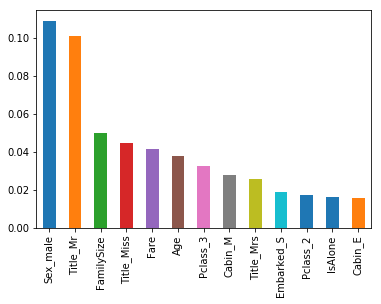

In [145]:
imp_feat[imp_feat > 0.01].sort_values(ascending=False).plot(kind='bar')

In [146]:
predictions_rf = rf.predict(s_test.iloc[:,1:])

In [147]:
# Generate Submission File
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                             'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_RF.csv", index=False)

### RF Grid Search

In [151]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [152]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [153]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of Parameters, using 3 fold cross validation
# Search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter= 100, cv = 3, verbose = 2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.9s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [154]:
rf_random.best_params_

{'n_estimators': 203,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [155]:
# Finalize using best
rf = RandomForestClassifier(n_estimators=203, oob_score=True, n_jobs=-1, random_state=42, )